<a href="https://colab.research.google.com/github/ArslanAli5/Coursera_Capstone/blob/master/Final_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# London Borough Cluster

In [0]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip3 install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip3 install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

## MY Foursquare API 

In [0]:
# @hidden_cell
CLIENT_ID = '5I5NZJB4E5YXG0P0C2FCI5IB3UDDNAMDVCZVCDMWKHGEUG4X' # your Foursquare ID
CLIENT_SECRET = '0YCOB4FJXZZ024LSWXJP1DNMTYCRT4X5D2B3PT0KSYGGNADD' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Income_Report.csv to Income_Report.csv
User uploaded file "Income_Report.csv" with length 1804 bytes


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Income_Report.csv']))

In [376]:
df2= df2.drop(0)
df2 =df2.reset_index(drop=True)
df2.head()


,Borough,"% with Household Income less than £15,000 (2009)",Median Weekly Household Income (2009),Median 2 Bedroom Weekly Rent (Oct 2010),Median House Price (2009),% Home Ownership (2009),Earnings to House Price Ratio (2009)
0,Barking and Dagenham,18.5,£528,£184,"£160,000",50,6.1
1,Barnet,10.9,£686,£242,"£290,000",63,9.1
2,Bexley,12.4,£647,£173,"£196,000",79,7.0
3,Brent,15.0,£590,£233,"£275,000",51,9.7
4,Bromley,9.8,£718,£196,"£249,000",75,8.8


## Data Cleaning or Wrangling

Getting the each column names

In [377]:
df2.columns

Index(['Borough', '% with Household Income less than £15,000 (2009)',
       'Median Weekly Household Income (2009)',
       'Median 2 Bedroom Weekly Rent (Oct 2010)', 'Median House Price (2009)',
       '% Home Ownership (2009)', 'Earnings to House Price Ratio (2009)'],
      dtype='object')

Renaming the each coloumn

In [0]:
df2 =df2.rename(columns={"Median Weekly Household Income (2009)": "Weekly Income",
                    "Median 2 Bedroom Weekly Rent (Oct 2010)": "Weekly Rent rate",
                    "Median House Price (2009)":"AVG-House Price",
                    "% with Household Income less than £15,000 (2009)":"Income < 15000",
                    "Earnings to House Price Ratio (2009)":"Earnings to House Price Ratio",
                    "% Home Ownership (2009)":"Home Ownership %"})

In [0]:
df2['Weekly Income'] = df2['Weekly Income'].str.replace(',', '').str.replace('£', '').astype(int)
df2['Weekly Rent rate'] = df2['Weekly Rent rate'].str.replace(',', '').str.replace('£', '').astype(int)
df2['AVG-House Price'] = df2['AVG-House Price'].str.replace(',', '').str.replace('£', '').astype(int)

### Getting the Coordinates of each Borough

In [380]:
longi = []
lati = []
for address in df2['Borough']:
  geolocator = Nominatim(user_agent="foursquare_agent")
  location = geolocator.geocode(address)
  latitude = location.latitude
  longitude = location.longitude
  print(latitude, longitude)
  #applending each cordinates in the list
  lati.append(latitude) 
  longi.append(longitude) 

51.5541171 0.15050434261994267
51.65309 -0.2002261
39.9692378 -82.936864
32.9373463 -87.1647184
51.4028046 0.0148142
39.9448402 -75.1198911
51.3713049 -0.101957
51.5126553 -0.3051952
51.6520851 -0.0810175
51.4820845 -0.0045417
51.5432402 -0.0493621
51.4920377 -0.2236401
51.587929849999995 -0.10541010599099046
51.5967688 -0.33727515543507014
51.0043613 -2.337474942629507
51.542519299999995 -0.44833493117949663
51.4686132 -0.3613471
51.5384287 -0.0999051
51.4875417 -0.1682205
51.4096275 -0.3062621
51.5013012 -0.117287
51.4624325 -0.0101331
51.410802849999996 -0.18809850595572736
51.52999955 0.02931796029382208
51.5763203 0.0454097
51.44046095 -0.3055192359117199
51.5029222 -0.103458
30.5672947 -100.6432359
51.1288633 1.2986686
42.3756401 -71.2358004
51.4570271 -0.1932607
39.8366528 -105.0372046


### Making the Dataframe of cordinates

In [0]:

df = pd.DataFrame(list(zip(lati, longi)), columns = [ 'Latitude','Longitude',])

In [382]:
df.head()

,Latitude,Longitude
0,51.554117,0.150504
1,51.653090,-0.200226
2,39.969238,-82.936864
3,32.937346,-87.164718
4,51.402805,0.014814


Conocatenating the two dataframe

In [0]:

dataframe = pd.concat([df2['Borough'], df], axis=1, sort=False)

In [383]:
dataframe

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.653090,-0.200226
2,Bexley,39.969238,-82.936864
3,Brent,32.937346,-87.164718
4,Bromley,51.402805,0.014814
5,Camden,39.944840,-75.119891
6,Croydon,51.371305,-0.101957
7,Ealing,51.512655,-0.305195
8,Enfield,51.652085,-0.081018
9,Greenwich,51.482084,-0.004542


### Getting the London Cordinates

In [384]:
address = 'London'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


### Visualizing the the Borough

In [385]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10)
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe.Latitude, dataframe.Longitude, dataframe.Borough):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Staked Visualization of of Weekly Rent RATE and Weekly INOME
Sortign the values by weekly Rent rate for visualization

In [386]:
df2.sort_values(by=['Weekly Rent rate'], inplace=True)
df2.head()

,Borough,Income < 15000,Weekly Income,Weekly Rent rate,AVG-House Price,Home Ownership %,Earnings to House Price Ratio
2,Bexley,12.4,647,173,196000,79,7.0
14,Havering,12.6,642,183,199995,76,7.1
0,Barking and Dagenham,18.5,528,184,160000,50,6.1
27,Sutton,10.9,680,196,210000,70,8.1
4,Bromley,9.8,718,196,249000,75,8.8


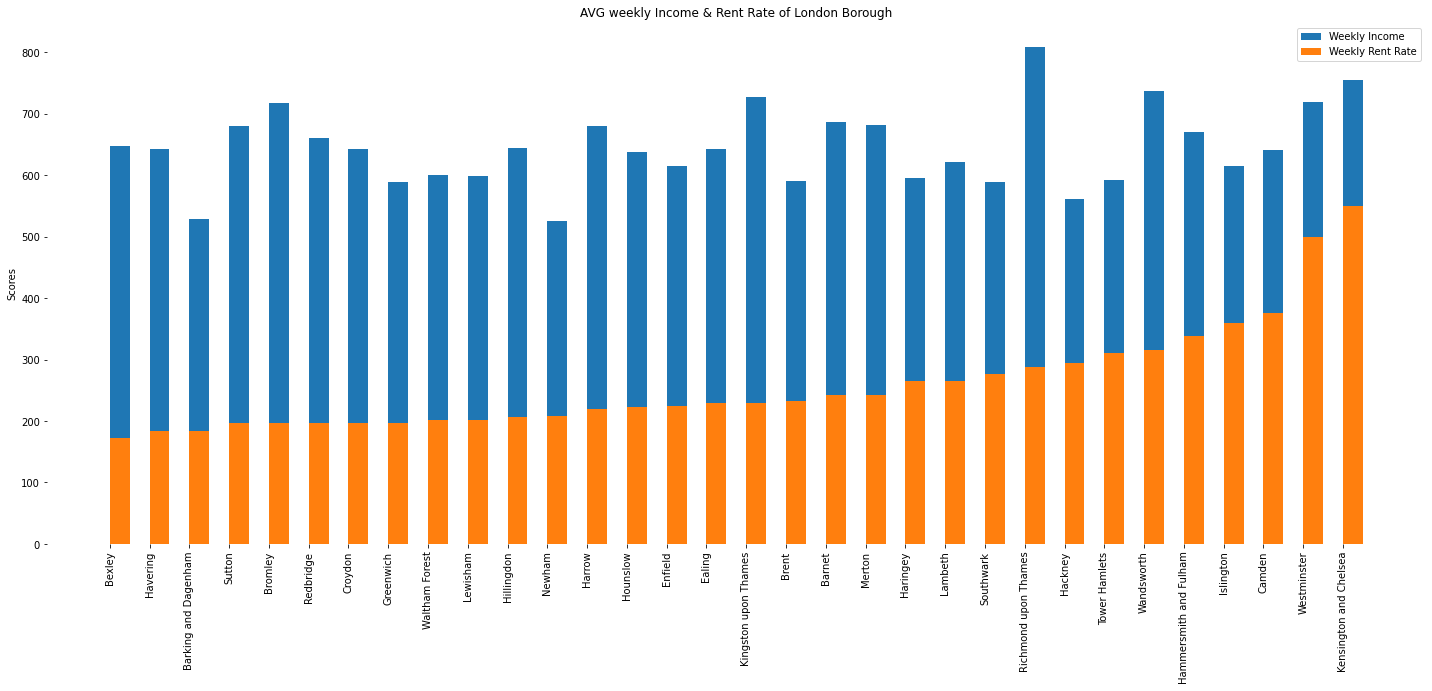

In [370]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df2['Borough']
men_means = df2['Weekly Income']
women_means = df2['Weekly Rent rate']
num = len(labels)
x = np.arange(num)  # the label locations

width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x , men_means, width, label='Weekly Income',align='edge')
rects2 = ax.bar(x, women_means, width, label='Weekly Rent Rate',align='edge')
#Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('AVG weekly Income & Rent Rate of London Borough')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.box(False)
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

Sorting the values by Average House price in each Borough

In [0]:
df_sorted = df2.set_index('Borough')
df_sorted = df_sorted[['AVG-House Price']]

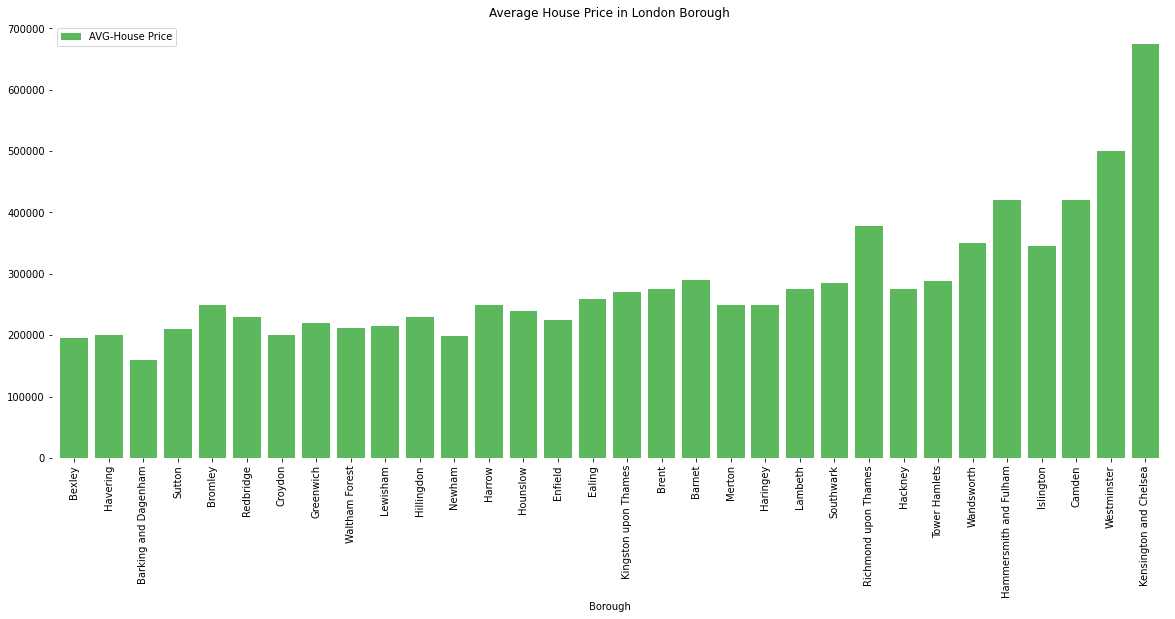

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns
df_sorted.plot(kind='bar', figsize=(20, 8), width = 0.8, color = ['#5cb85c', '#5bc0de','#5bc0de', '#5bc0de', '#5bc0de', '#5bc0de', '#5bc0de'])
#sns.set(font_scale=.90)
plt.title("Average House Price in London Borough")
plt.box(False)

## Clusting London Based on Coffee Shop
Defining the function to get the Coffee Shops within the radius of 2 Kilometer

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius,
        LIMIT,
        cotegId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
london_venues = getNearbyVenues(names=dataframe['Borough'],
                                   latitudes=dataframe['Latitude'],
                                   longitudes=dataframe['Longitude']
                                  )

Counting the obtained Location in each Borough

In [0]:
london_venues_grouped = london_venues.groupby('Borough').count()


In [0]:
london_venues_grouped.sort_values(by=['Longitude'], inplace=True)

venues_count =london_venues_grouped['Venue']

### Ploting the Grapth for No. of obtained Coffee Shops

Text(0.5, 1.0, "Percentage of Respondent's intrest in Data Science Area")

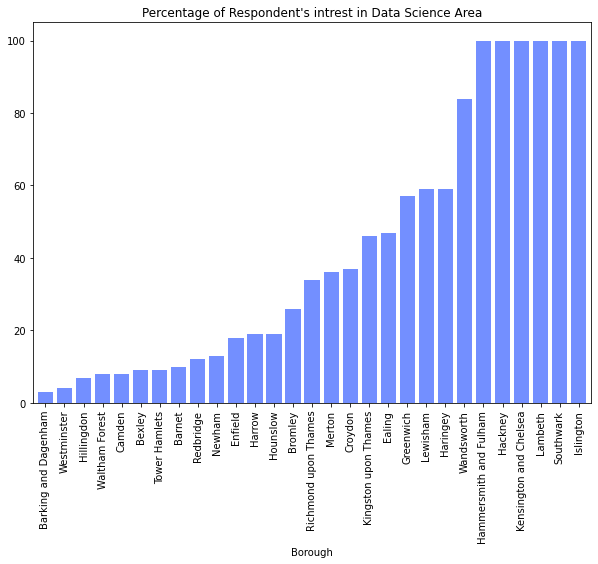

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns
venues_count.plot(kind='bar', figsize=(10, 7), width = 0.8, color = ['#738fff'])
#sns.set(font_scale=.90)
plt.title("Percentage of Respondent's intrest in Data Science Area")


In [0]:
df2 =df2.set_index('Borough')

In [0]:
result = pd.concat([df2, venues_count], axis=1)

In [0]:
result['Venue'] = result["Venue"].fillna(0)

### Normalization of Data

In [397]:
from sklearn.preprocessing import StandardScaler

X = result.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 3.07384980e-02, -1.00649676e+00, -8.46048625e-01,
         1.80834597e+00, -6.70142740e-01, -8.16228305e-01],
       [-4.85866581e-02, -8.90724303e-01, -8.06971353e-01,
         1.59994115e+00, -6.36635603e-01, -1.06737548e+00],
       [-1.85720022e+00, -8.79147058e-01, -1.19818425e+00,
        -2.06233934e-01, -9.71706973e-01, -9.83659753e-01],
       [ 5.54284528e-01, -7.40220115e-01, -7.09106995e-01,
         1.18313151e+00, -3.01564233e-01, -1.06737548e+00],
       [ 1.15715571e+00, -7.40220115e-01, -3.27626738e-01,
         1.53047288e+00, -6.70142740e-02, -3.41839205e-01],
       [ 2.36983904e-01, -7.40220115e-01, -5.13476094e-01,
         1.11366324e+00, -6.03128466e-01, -7.32512582e-01],
       [-3.27216269e-02, -7.40220115e-01, -8.02031673e-01,
         6.27385335e-01, -5.36114192e-01, -3.48815515e-02],
       [-8.89433313e-01, -7.40220115e-01, -6.11291544e-01,
        -4.14638751e-01, -4.69099918e-01,  5.23223273e-01],
       [-6.99052938e-01, -6.82333889e-01, -6.895

### Applying the K-Means Alogorithm


In [398]:
from sklearn.cluster import KMeans 
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 2 2]


Adding the the label of to the Dataframe

In [0]:
result["Labels"] = labels
df1 = dataframe.set_index('Borough')
result = pd.concat([result, df1], axis=1)
result = result.reset_index()

### Visualization the Clusters

In [400]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(result['Latitude'], result['Longitude'], result['index'], result['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters